/Users/martynaurbanek/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:25: MatplotlibDeprecationWarning: The griddata function was deprecated in version 2.2.


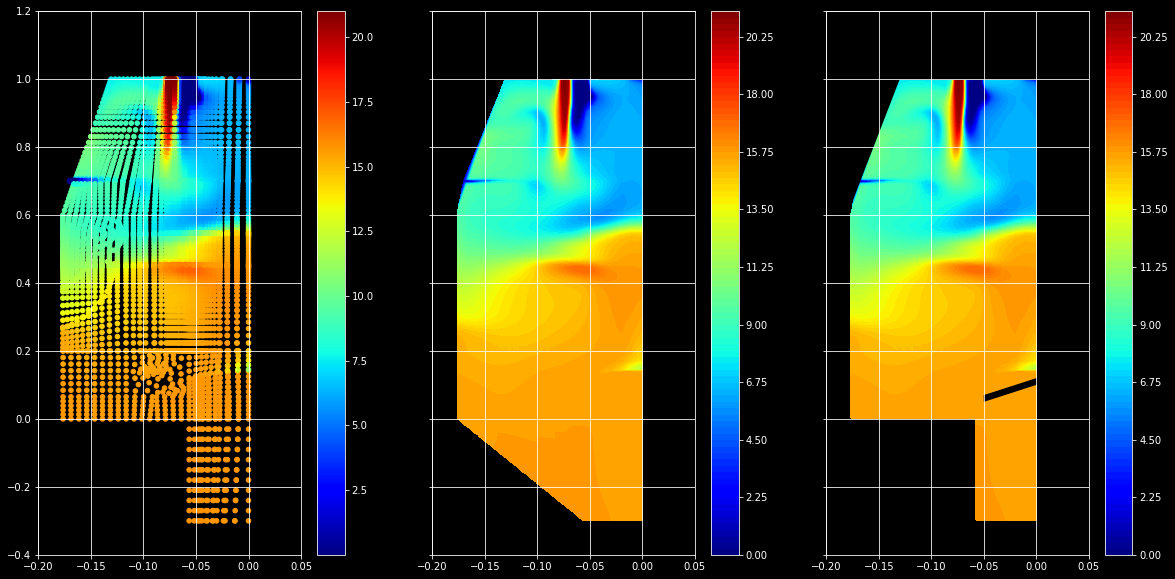

In [88]:
import os, sys
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
from matplotlib import cm
import scipy.interpolate as scin
from matplotlib.mlab import griddata
import matplotlib.patches as ptch

plt.style.use('dark_background')


x = pd.read_csv('NG_SG01-03-C01-00500_cross-section.dat', usecols=['    x-coordinate'])
x = x['    x-coordinate'].values.tolist()

y = pd.read_csv('NG_SG01-03-C01-00500_cross-section.dat', usecols=['    y-coordinate'])
y = y['    y-coordinate'].values.tolist()

o2 = pd.read_csv('NG_SG01-03-C01-00500_cross-section.dat', usecols=['          o2_dry'])
o2 = o2['          o2_dry'].values.tolist()

Xi = np.linspace(min(x), max(x), num=500)
Yi = np.linspace(min(y), max(y), num=500)
Z = griddata(x, y, o2, Xi, Yi, interp = 'linear')
# print(Z)
X, Y = np.meshgrid (Xi, Yi)

fig, ax = plt.subplots(1,3,figsize=(20,10), sharey=True, sharex=True)

image0 = ax[0].scatter(x, y, s=21, c=o2, marker = 'o', cmap = cm.jet)
ax[0].grid(True)

image1 = ax[1].contourf(X,Y,Z,100,cmap=cm.jet)
ax[1].grid(True)

image2 = ax[2].contourf(X,Y,Z,100,cmap=cm.jet)
ax[2].grid(True)

ax[2].set_xlim(-0.2,0.05)
ax[2].set_ylim(-0.4,1.2)

rect = ptch.Rectangle((-0.2, -0.4), 0.141, 0.4, fill=True, color='black')
ax[2].add_patch(rect)

rect = ptch.Rectangle((-0.2, 1), 1, 0.4, fill=True, color='black')
ax[2].add_patch(rect)

tr = ptch.Polygon(np.array([[-0.18,0.6], [-0.13,1], [-0.18, 1]]), closed=True, facecolor='black', edgecolor='none')
ax[2].add_patch(tr)


ix = np.linspace(-0.05, 0.05)
iy = np.sin(ix)+0.1
iy2 = np.sin(ix)+0.12
verts = list(zip(ix, iy)) + list(zip(ix, iy2))[::-1]
poly = ptch.Polygon(verts, closed=True, facecolor='black', edgecolor='none')
ax[2].add_patch(poly)

plt.colorbar(image0, ax=ax[0])
plt.colorbar(image1, ax=ax[1])
plt.colorbar(image2, ax=ax[2])
plt.show()
